6. Perform data preprocessing step on the above dataset: perform outlier and missing data analysis towards
building a refined dataset.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path=r'/content/cars.csv'
car_data=pd.read_csv(file_path)
car_data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [2]:
%pip install scikit-learn pandas numpy matplotlib seaborn xgboost

In [3]:
#Display dataset information and statistics
print(car_data.info())
print(car_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
None
           Car_ID        Year  Kilometers_Driven     Mileage       Engine  \
count  100.000000   100.00000         100.000000  100.0000

Original dataset shape: (100, 13)
Dataset shape after outlier removal: (96, 13)


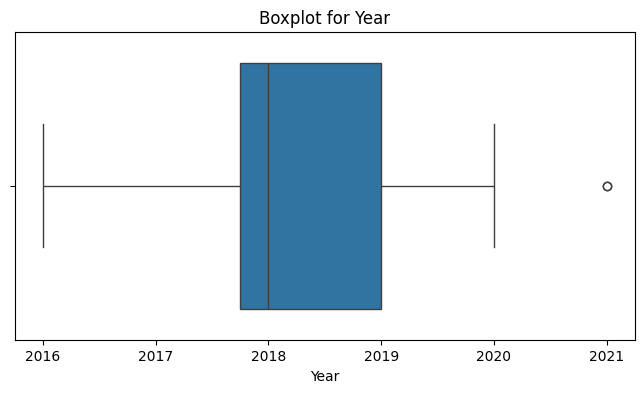

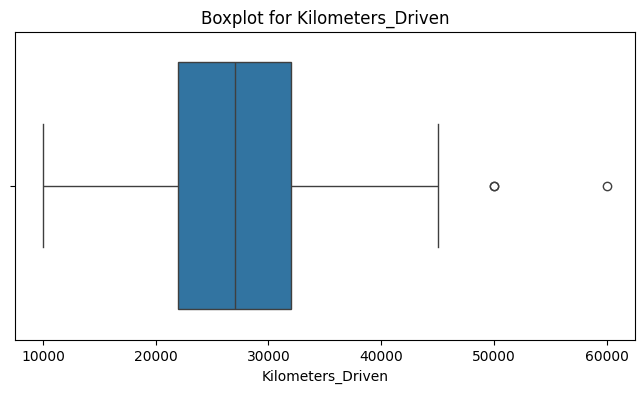

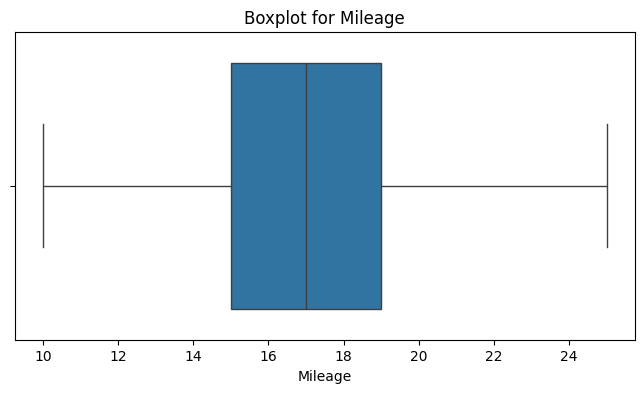

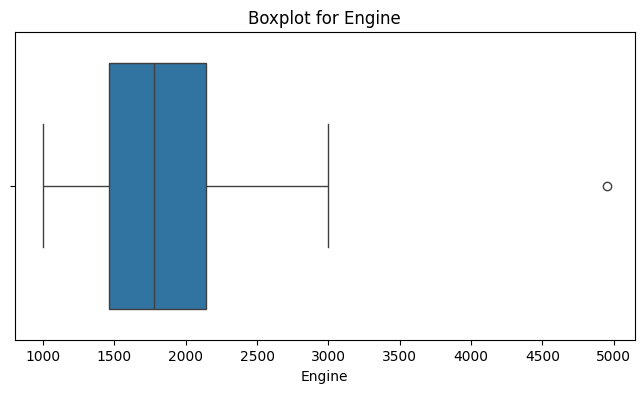

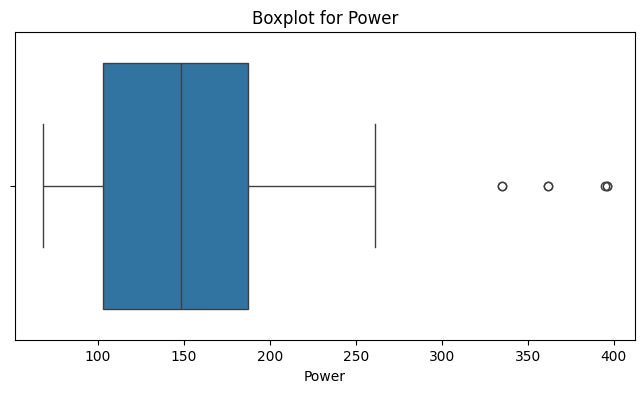

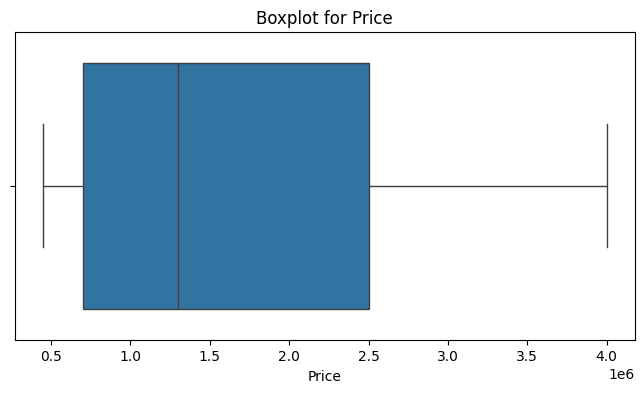

In [4]:
# Step 1: Outlier Exploration
z_scores = np.abs(stats.zscore(car_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
data_no_outliers = car_data[~outliers]

print(f"Original dataset shape: {car_data.shape}")
print(f"Dataset shape after outlier removal: {data_no_outliers.shape}")

# List only numeric columns (remove spaces and categorical features)
numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']
# Visualize outliers using boxplots
for feature in numeric_features:
    if feature in car_data.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=car_data[feature]) # Boxplot for numeric feature
        plt.title(f'Boxplot for {feature}')
        plt.show()

In [5]:
# Step 2: Missing Data Analysis
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Impute missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numeric columns
for col in numeric_features:
    if col in car_data.columns:
        car_data[col] = num_imputer.fit_transform(car_data[[col]])

# Impute categorical columns
for col in categorical_features:
    if col in car_data.columns:
        car_data[col] = cat_imputer.fit_transform(car_data[[col]]).ravel()

#Verify no missing values remain
print("\nMissing Values After Imputation:")
print(car_data.isnull().sum())


Missing Values After Imputation:
Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Feature 'Car_Age' created. Here's the first few rows:
     Year  Car_Age
0  2018.0      6.0
1  2019.0      5.0
2  2017.0      7.0
3  2020.0      4.0
4  2016.0      8.0


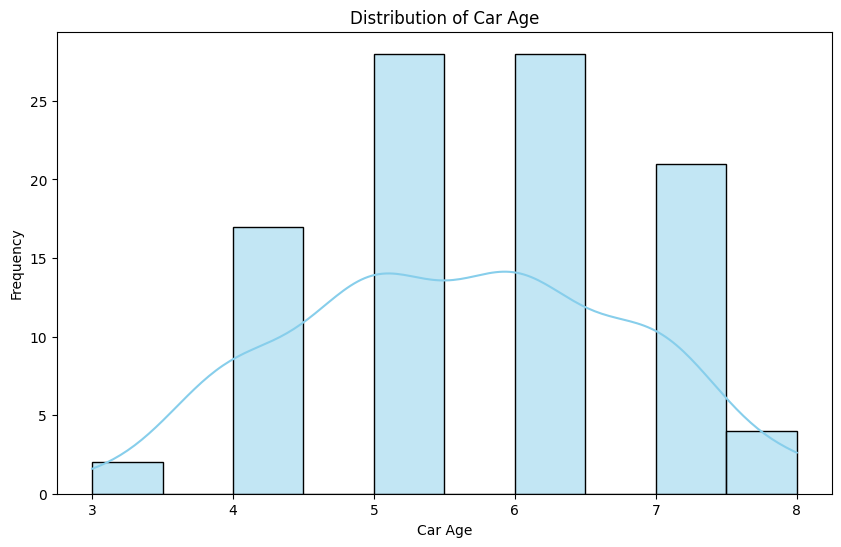


Feature 'Price_Per_Km' created. Here's the first few rows:
       Price  Kilometers_Driven  Price_Per_Km
0   800000.0            50000.0     16.000000
1  1000000.0            40000.0     25.000000
2  2500000.0            20000.0    125.000000
3   600000.0            30000.0     20.000000
4   850000.0            60000.0     14.166667


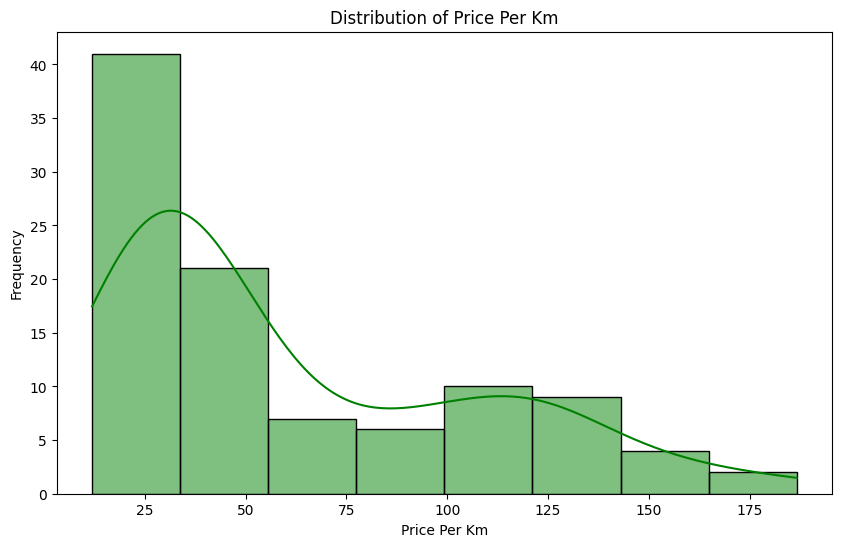


Feature 'Price_Deviation' created. Here's the first few rows:
       Price  Price_Deviation
0   800000.0              0.0
1  1000000.0              0.0
2  2500000.0              0.0
3   600000.0              0.0
4   850000.0              0.0


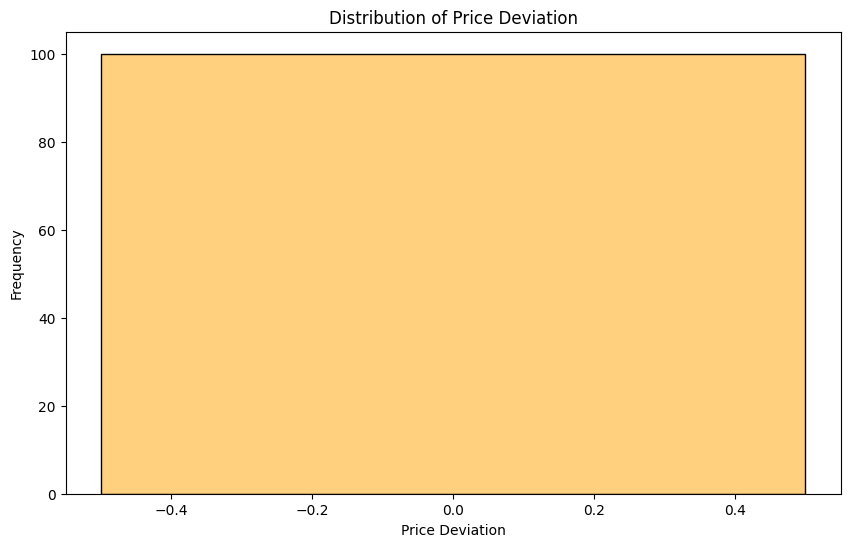


Feature 'Year_Kms_Interaction' created. Here's the first few rows:
     Year  Kilometers_Driven  Year_Kms_Interaction
0  2018.0            50000.0           100900000.0
1  2019.0            40000.0            80760000.0
2  2017.0            20000.0            40340000.0
3  2020.0            30000.0            60600000.0
4  2016.0            60000.0           120960000.0


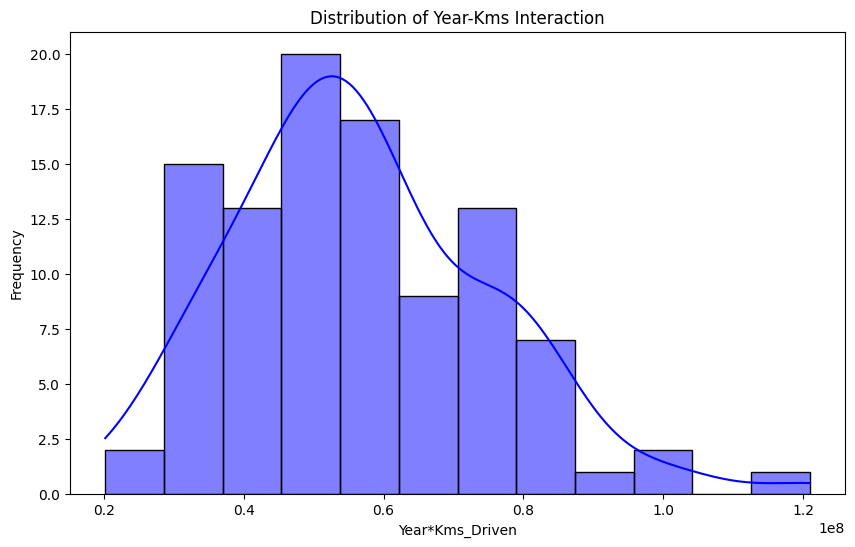


Feature 'Price_to_Mileage_Ratio' created. Here's the first few rows:
       Price  Mileage  Price_to_Mileage_Ratio
0   800000.0     15.0            53333.333333
1  1000000.0     17.0            58823.529412
2  2500000.0     10.0           250000.000000
3   600000.0     23.0            26086.956522
4   850000.0     18.0            47222.222222


In [6]:
# Step 3: Feature Engineering
# 1. Create ‘Car_Age' feature: The age of the car based on the current year
current_year = 2024
car_data['Car_Age'] = current_year - car_data['Year']
print("Feature 'Car_Age' created. Here's the first few rows:")
print(car_data[['Year', 'Car_Age']].head())
# Plot the distribution of 'Car_Age'
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Car_Age'], kde=True, color='skyblue')
plt.title("Distribution of Car Age")
plt.xlabel("Car Age")
plt.ylabel("Frequency")
plt.show()

# 2. Create 'Price_Per_Km' feature: Ratio of 'Price' to 'Kilometers_Driven'
car_data['Price_Per_Km'] = car_data['Price'] / car_data['Kilometers_Driven']
print("\nFeature 'Price_Per_Km' created. Here's the first few rows:")
print(car_data[['Price', 'Kilometers_Driven', 'Price_Per_Km']].head())
# Plot the distribution of 'Price_Per_Km'
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price_Per_Km'], kde=True, color='green')
plt.title("Distribution of Price Per Km")
plt.xlabel("Price Per Km")
plt.ylabel("Frequency")
plt.show()

# 3. Create 'Price_Deviation' feature: Deviation between 'Price' and a potential 'Present_Price' (using 'Price' for now as 'Present_Price' is not available)
# Note: 'Present_Price' is not in the dataset. Using 'Price' as a placeholder for now.
car_data['Price_Deviation'] = car_data['Price'] - car_data['Price'] # This will result in 0, needs adjustment if 'Present_Price' is introduced
print("\nFeature 'Price_Deviation' created. Here's the first few rows:")
print(car_data[['Price', 'Price_Deviation']].head())
#Plot the distribution of 'Price_Deviation'
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price_Deviation'], kde=True, color='orange')
plt.title("Distribution of Price Deviation")
plt.xlabel("Price Deviation")
plt.ylabel("Frequency")
plt.show()

# 4. Create 'Year_Kms_Interaction' feature: Product of 'Year' and 'Kilometers_Driven'
car_data['Year_Kms_Interaction'] = car_data['Year'] * car_data['Kilometers_Driven']
print("\nFeature 'Year_Kms_Interaction' created. Here's the first few rows:")
print(car_data[['Year', 'Kilometers_Driven', 'Year_Kms_Interaction']].head())
#Plot the distribution of 'Year_Kms_Interaction'
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Year_Kms_Interaction'], kde=True, color='blue')
plt.title("Distribution of Year-Kms Interaction")
plt.xlabel("Year*Kms_Driven")
plt.ylabel("Frequency")
plt.show()

# 5. Create 'Price_to_Mileage_Ratio' feature: Ratio of 'Price' to 'Mileage'
car_data['Price_to_Mileage_Ratio'] = car_data['Price'] / car_data['Mileage']
print("\nFeature 'Price_to_Mileage_Ratio' created. Here's the first few rows:")
print(car_data[['Price', 'Mileage', 'Price_to_Mileage_Ratio']].head())

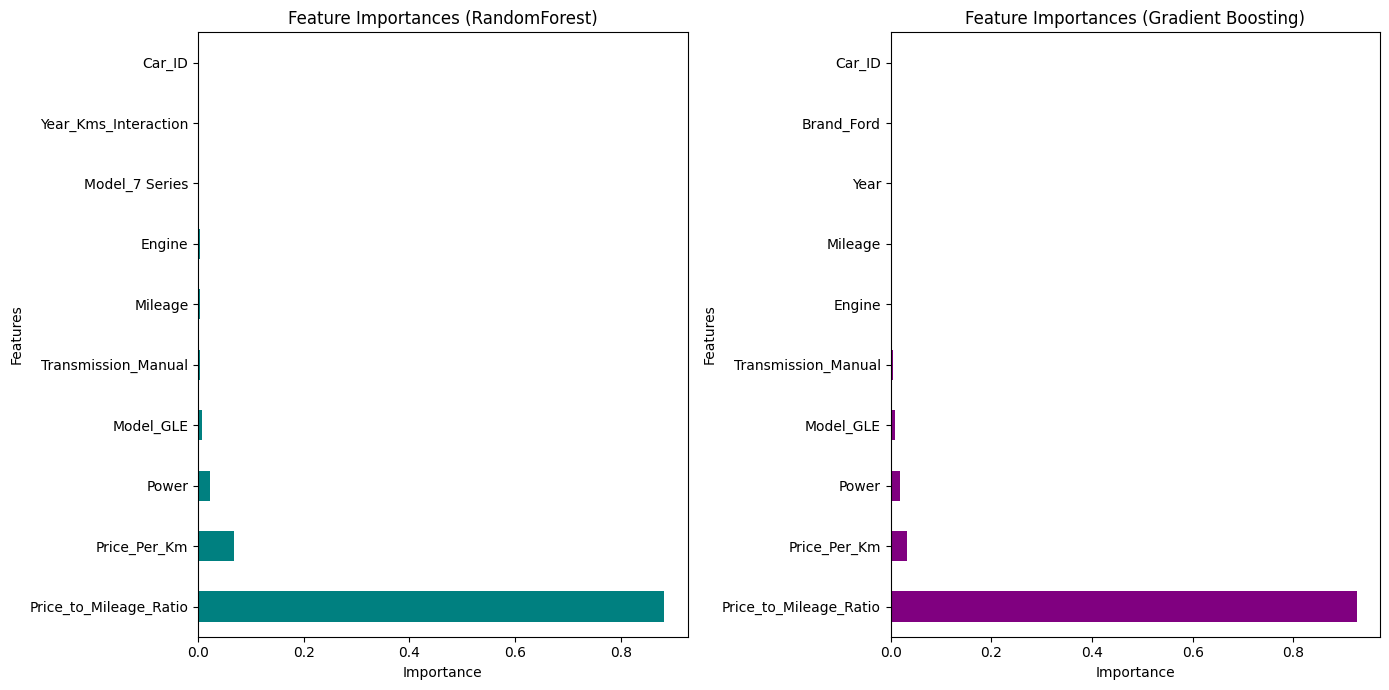

In [7]:
# Step 4: Feature Important Scaling and Encoding
# Apply one-hot encoding to categorical features
X = pd.get_dummies(car_data.drop('Price', axis=1), drop_first=True)
y = car_data['Price']

# Initialize and fit RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Initialize and fit GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X, y)

# Extract feature importances from RandomForest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Extract feature importances from GradientBoosting
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)

# Create a subplot with two side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot RandomForest feature importances
rf_feature_importances.sort_values(ascending=False).head(10).plot(kind='barh', color='teal', ax=axes[0])
axes[0].set_title("Feature Importances (RandomForest)")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Features")

# Plot GradientBoosting feature importances
gb_feature_importances.sort_values(ascending=False).head(10).plot(kind='barh', color='purple', ax=axes[1])
axes[1].set_title("Feature Importances (Gradient Boosting)")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Features")

# Show the plots
plt.tight_layout() # Adjust layout to ensure labels don't overlap
plt.show()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Calculate R-squared (R2) for both models to compare accuracy
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Calculate Mean Squared Error (MSE) for both models for additional comparison
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Print the results
print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Gradient Boosting R-squared: {gb_r2:.4f}")
print(f"Random Forest Mean Squared Error: {rf_mse:.4f}")
print(f"Gradient Boosting Mean Squared Error: {gb_mse:.4f}")

# Comparing which model has better performance
if rf_r2 > gb_r2:
    print("Random Forest has a higher R-squared (better accuracy).")
else:
    print("Gradient Boosting has a higher R-squared (better accuracy).")

Random Forest R-squared: 0.9770
Gradient Boosting R-squared: 0.9843
Random Forest Mean Squared Error: 18832062500.0000
Gradient Boosting Mean Squared Error: 12858053381.4106
Gradient Boosting has a higher R-squared (better accuracy).
